<a href="https://colab.research.google.com/github/Douglas-Coelho/Analise_exploratoria-DIO/blob/main/Trabalhando_com_tabelas_distintas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Trabalhando com Planilhas do Excel**

In [ ]:
#Importando a biblioteca Pandas

import pandas as pd

In [ ]:
#Leitura dos arquivos

df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
df2.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3
3,Fortaleza,2019-02-10,20.95,1004,6
4,Fortaleza,2019-01-01,14.25,1004,6


In [ ]:
#Concatenando todos os arquivos

df = pd.concat([df1,df2, df3, df4, df5])

In [ ]:
#Passando as 5 primeiras linhas para mostrar a junção

df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#Passando as 5 últimas linhas para mostrar a junção

df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
#Pegando uma amostra do nosso conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
182,Natal,2019-01-02,6.60,1037,2
126,Recife,2019-03-02,41.87,980,8
181,Natal,2019-01-02,244.83,1037,2
73,Aracaju,2018-01-01,159.78,1521,3
61,Salvador,2019-01-01,4.54,1036,3


In [ ]:
#Identificando os tipos de dados da tabela
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Alterando o dado da coluna LojaID

df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

##**Tratando valores faltantes**

In [ ]:
#Consultando linhas com valores faltantes

df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo os valores nulos pela média na memória do arquivo

df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df["Vendas"].fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Outra maneira de se abordar o assunto é apagando a linha que está nula

df.dropna(inplace=True)

In [ ]:
#Apagando os valores nulos com base em apenas uma coluna

df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Removendo linhas com valores faltantes em todas as colunas. APENAS SE TIVER EM TODAS AS COLUNAS

df.dropna(how="all", inplace=True)

##**Criando novas colunas**

In [ ]:
#Criando a coluna "Receita"

df["Receita"] = df["Vendas"].mul(df["Qtde"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Caso não tivéssemos a coluna Qtde poderíamos achar através de um cálculo
#Cálculo esse só para exemplificar a conta de dividir

df["Receita/Vendas"] = df["Receita"] / df["Vendas"]
#Me retornou por padrão o tipo float64, então converti para int64
df["Receita/Vendas"] = df["Receita/Vendas"].astype("int64")
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8


In [ ]:
#Achando a maior receita

df["Receita"].max()

3544.0

In [ ]:
#Achando a menor receita

df["Receita"].min()

3.34

In [ ]:
#Utilizando essa função consigo identificar os 3 maiores valores da coluna "Receita"

df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4
51,Natal,2018-01-21,859.0,852,4,3436.0,4
55,Natal,2019-01-08,859.0,854,4,3436.0,4


In [ ]:
#Utilizando essa função consigo identificar os 3 menores valores da coluna "Receita"

df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1
65,Recife,2019-01-01,4.01,981,1,4.01,1
92,Natal,2019-01-02,4.57,1035,1,4.57,1


In [ ]:
#Fazer a soma das receitas de todas as cidades

df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando o conjunto de dados do maior para o menor

df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4
55,Natal,2019-01-08,859.0,854,4,3436.0,4
51,Natal,2018-01-21,859.0,852,4,3436.0,4
30,Natal,2018-10-02,856.0,853,4,3424.0,4
41,Natal,2018-05-20,835.0,852,4,3340.0,4
38,Natal,2018-02-25,828.0,852,4,3312.0,4
10,Natal,2018-10-27,828.0,852,4,3312.0,4
69,Natal,2019-03-24,817.0,852,4,3268.0,4
62,Natal,2018-02-10,793.0,854,4,3172.0,4
52,Natal,2018-04-27,778.0,854,4,3112.0,4


##**Trabalhando com datas**

In [ ]:
# Transformando a coluna de data em tipo inteiro

df["Data"] = df["Data"].astype("int64")

In [ ]:
df["Data"].dtypes

dtype('int64')

In [ ]:
#Passando para o formato de "datetime"
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas             int64
dtype: object

In [ ]:
#Fazendo um agrupamento para tentar descobrir a receita total de cada ano

df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando coluna com o ano da venda

df["Ano_venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda
90,Salvador,2019-01-01,100.54,1036,2,201.08,2,2019
14,Recife,2019-01-12,102.91,982,3,308.73,3,2019
73,Aracaju,2018-01-01,159.78,1521,3,479.34,3,2018
46,Recife,2019-01-01,239.17,981,8,1913.36,8,2019
225,Salvador,2019-01-02,36.23,1035,1,36.23,1,2019


In [ ]:
#Criando a coluna de mês e dia
df["Mes"], df["Dia"] = df["Data"].dt.month, df["Data"].dt.day

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Mes,Dia
22,Salvador,2019-01-01,32.57,1035,1,32.57,1,2019,1,1
132,Fortaleza,2019-03-02,17.49,983,5,87.45,5,2019,3,2
28,Recife,2019-01-01,123.69,983,3,371.07,3,2019,1,1
69,Recife,2019-01-01,38.83,981,1,38.83,1,2019,1,1
62,Recife,2019-01-01,23.04,983,6,138.24,6,2019,1,1


In [ ]:
#Retornando a data mais antiga

df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
df.shape

(894, 10)

In [ ]:
#Calculando a diferença de dias

df["Diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Mes,Dia,Diferenca_dias
189,Salvador,2019-01-02,139.73,1037,2,279.46,2,2019,1,2,366 days
89,Fortaleza,2019-01-01,7.19,1004,5,35.95,5,2019,1,1,365 days
35,Aracaju,2018-01-01,40.60,1520,3,121.80,3,2018,1,1,0 days
48,Salvador,2019-01-01,127.28,1035,2,254.56,2,2019,1,1,365 days
5,Recife,2019-01-01,13.59,980,3,40.77,2,2019,1,1,365 days


In [ ]:
#Criando a coluna do trimestre

df["Trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Mes,Dia,Diferenca_dias,Trimestre_venda
118,Fortaleza,2019-03-02,17.70,981,5,88.50,5,2019,3,2,425 days,1
150,Salvador,2019-01-02,11.13,1035,2,22.26,2,2019,1,2,366 days,1
25,Fortaleza,2019-01-01,80.31,1004,4,321.24,4,2019,1,1,365 days,1
41,Salvador,2019-02-13,9.86,1035,2,19.72,2,2019,2,13,408 days,1
176,Salvador,2019-01-02,19.42,1035,3,58.26,3,2019,1,2,366 days,1


In [ ]:
 #Filtrando as vendas de 2019 no mês de Março

 Vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
Vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Mes,Dia,Diferenca_dias,Trimestre_venda
113,Fortaleza,2019-03-02,38.63,980,2,77.26,2,2019,3,2,425 days,1
120,Recife,2019-03-02,184.90,982,4,739.60,4,2019,3,2,425 days,1
130,Recife,2019-03-02,12.36,983,4,49.44,4,2019,3,2,425 days,1
42,Natal,2019-03-02,775.00,854,2,1550.00,2,2019,3,2,425 days,1
120,Salvador,2019-03-02,140.17,1036,2,280.34,2,2019,3,2,425 days,1
125,Recife,2019-03-02,37.60,983,4,150.40,4,2019,3,2,425 days,1
119,Recife,2019-03-02,152.30,982,7,1066.10,7,2019,3,2,425 days,1
133,Recife,2019-03-02,14.67,980,7,102.69,7,2019,3,2,425 days,1
119,Salvador,2019-03-02,136.37,1034,2,272.74,2,2019,3,2,425 days,1
112,Recife,2019-03-02,133.59,982,1,133.59,1,2019,3,2,425 days,1


## **Visualização de dados**

In [ ]:
#Puxando o ID das lojas e monstrando a quantidade de vendas realizadas pelas mesmas

df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

### Vamos trabalhar agora com a biblioteca matplotlib


---


Essa é uma biblioteca totalmente integrada a biblioteca Pandas

<Axes: >

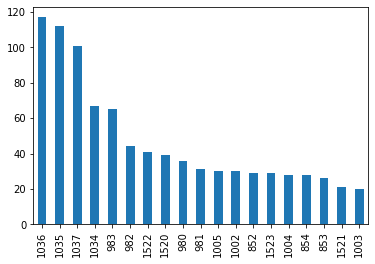

In [ ]:
#Plotando gráfico: Barras Verticais

df["LojaID"].value_counts(ascending=False).plot.bar()

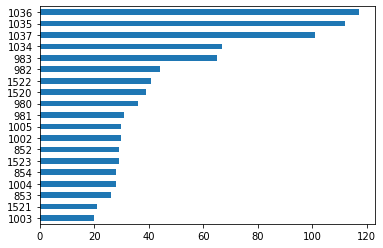

In [ ]:
#Plotando gráfico: Barras horizontais
#Para remover a linha que fic a logo acima do gráfico, basta utilizar ponto e vírgula

df["LojaID"].value_counts(ascending=True).plot.barh();

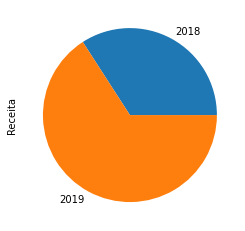

In [ ]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#Total de vendas por cidade

df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

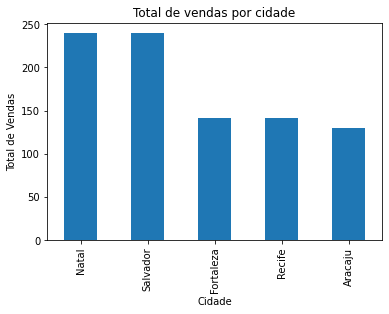

In [ ]:
#Adicionando um título ao gráfico e mudando o nome dos eixos

import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade");
plt.xlabel("Cidade");
plt.ylabel("Total de Vendas");

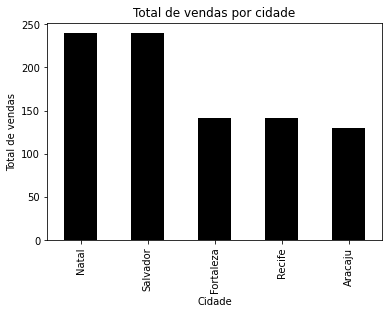

In [ ]:
#Alterando a cor do gráfico

df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="black");
plt.xlabel("Cidade");
plt.ylabel("Total de vendas");

In [ ]:
#Alterando o estilo de gráfico, pois matplotlib já vem com um padrão "Default"

plt.style.use("ggplot")

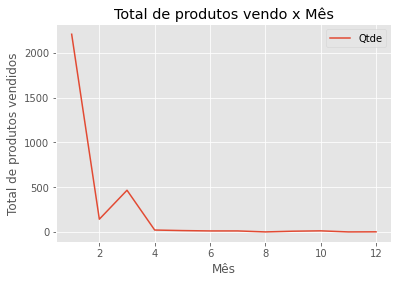

In [ ]:
df.groupby(df["Mes"])["Qtde"].sum().plot(title="Total de produtos vendo x Mês");
plt.xlabel("Mês");
plt.ylabel("Total de produtos vendidos");
plt.legend();

In [ ]:
df.groupby(df["Mes"])["Qtde"].sum()

Mes
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Selecionando apenas as vendas de 2019

df_2019 = df[(df["Ano_venda"] == 2019)]

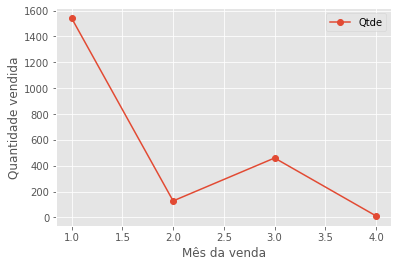

In [ ]:
#Total de produtos vendidos por mês em 2019
#Opções de marker
#marker="v", marker="o", marker="*", para mais opções olhar a documentação da biblioteca
df_2019.groupby(df_2019["Mes"])["Qtde"].sum().plot(marker="o")
plt.xlabel("Mês da venda")
plt.ylabel("Quantidade vendida")
plt.legend();

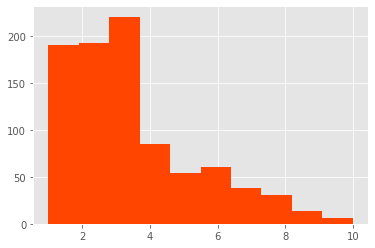

In [ ]:
#Plotando um histograma

plt.hist(df["Qtde"], color="orangered");

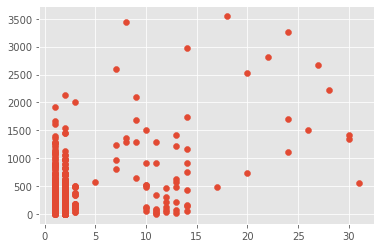

In [ ]:
#Plotando gráfico de dispersão
plt.scatter(x = df_2019["Dia"], y = df_2019["Receita"]);

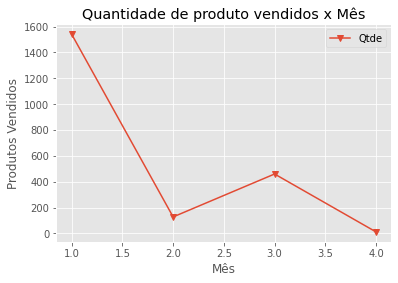

In [ ]:
#Salvando uma imagem
df_2019.groupby(df_2019["Mes"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produto vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Produtos Vendidos")
plt.legend()
plt.savefig("Grafico QTDE x mes.png")
